# | Barcelona Population Dataset EDA |

##### | TEAM 1 | ###
- Alfaisal Alqahtani.
- Awatef Alshehri.
- Khalid Alharthi.
- Nawaf Alhussain.
- Zahra Alali.

#### | Introduction |

A brief study on the demograohics of the city of Barcelona 
Population's date is one of the barcelona datasets. The population in this file contains informations by neighbourhood, by quinquennial ages and by genre of the city of Barcelona (2013-2017). 
In our case study we try to explore and analyze the provided information underlying in the population data of a neighbourhood.

Ref. (https://www.kaggle.com/xvivancos/barcelona-data-sets)

In [482]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import plotly.express as px
import plotly.graph_objs as go
import plotly
  

### | Loading Data |


In [405]:
popData = pd.read_csv("data/population.csv")
popData.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


#### - Dictionary
        - Year: 
                The yaer for the record of population group. 
        - District.Code: 
                The district code. 
        - District.Name: 
                The name of the distric for the district code.
        - Neighborhood.Code: 
                The code of the neiborhood that belongs to a specific district.
        - Neighborhood.Name: 
                The name of the neigborhood that goes with the nigborhood code.
        - Gender: 
                The Gender for population gruop. 
                (MALE - FEMALE)
        - Age: 
                The age of the population for the record group. 
                (0-4, 5-9, 10-14 ....)
        - Number: 
                The number of population. 

### | Meta Data| 

In [406]:
# general info about the data and its types
popData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 8 columns):
Year                 70080 non-null int64
District.Code        70080 non-null int64
District.Name        70080 non-null object
Neighborhood.Code    70080 non-null int64
Neighborhood.Name    70080 non-null object
Gender               70080 non-null object
Age                  70080 non-null object
Number               70080 non-null int64
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


- Is there any missing value in the population dataset?

In [476]:
popData.isnull().sum()

Year                0
DistrictCode        0
DistrictName        0
NeighborhoodCode    0
NeighborhoodName    0
Gender              0
Population          0
AgeGroup            0
dtype: int64

In [407]:
popData.shape

(70080, 8)

In [408]:
print(popData["District.Name"].unique())
print("Number or District:", + len(popData["District.Name"].unique()))

['Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí']
Number or District: 10


In [409]:
print(popData.Age.unique())
print("Number or Age Categories:", + len(popData.Age.unique()))

['0-4' '5-9' '10-14' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44'
 '45-49' '50-54' '55-59' '60-64' '65-69' '70-74' '75-79' '80-84' '85-89'
 '90-94' '>=95']
Number or Age Categories: 20


### | Cleaning |

- Renameing columns:
    - Remove "." in colmuns names.
    - Renaming the "Number" Columns to "Population".
- Creating sub data sets for each year (2013, 2014, ...).
- Combining the age and adding new columns Age Gruops.

In [410]:
#Renaming columns

popData = popData.rename(columns={"District.Code": "DistrictCode","District.Name": "DistrictName","Neighborhood.Code": "NeighborhoodCode", "Neighborhood.Name":"NeighborhoodName", "Number" : "Population" })
popData.head()

,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Age,Population
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [411]:
popData.Age.unique()

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '>=95'], dtype=object)

In [412]:
#function to fix age and combine it into 4 diffrent gruops
def combine_age(x):
    if x == ("0-4" or "5-9"):
        return "Children"
    elif x ==("10-14" or "15-19"):
        return "Adolescence"
    elif x == ("20-24" or "25-29" or "30-34" or "35-39" or "40-44" or "45-49" or "50-54" or "55-59"):
        return "Adult"
    else:
        return "Senior"
   




- Reference for choosing the age catigories: 

In [413]:
#applying the function to the data
popData["AgeGroup"] = popData['Age'].apply(combine_age)
popData.sample()

,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Age,Population,AgeGroup
11224,2017,8,Nou Barris,56,Vallbona,Female,55-59,3,Senior


In [414]:
#dropping the age column
popData.drop("Age", axis=1, inplace=True)
popData.sample()

,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Population,AgeGroup
37434,2015,9,Sant Andreu,59,el Bon Pastor,Female,87,Senior


In [427]:
print(popData.Year.unique())
print("Number or unique years:", + len(popData["Year"].unique()))

[2017 2016 2015 2014 2013]
Number or unique years: 5


In [415]:
# Creating sub data sets for each year
pop2013 = popData[popData.Year == 2013].reset_index()
pop2014 = popData[popData.Year == 2014].reset_index()
pop2015 = popData[popData.Year == 2015].reset_index()
pop2016 = popData[popData.Year == 2016].reset_index()
pop2017 = popData[popData.Year == 2017].reset_index()

### | Exploring |

#### | Table Visualization | 

In [416]:
# Data grouped by year and the sum of population for each year

popDataYears = (popData.groupby("Year")["Population"].sum()).to_frame().reset_index()
popDataYears


,Year,Population
0,2013,1611822
1,2014,1602386
2,2015,1604555
3,2016,1608746
4,2017,1620809


- No significant diffrent in population among the years 

In [438]:
pop2013.head()

,index,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Population,AgeGroup
0,56064,2013,1,Ciutat Vella,1,el Raval,Male,227,Children
1,56065,2013,1,Ciutat Vella,2,el Barri Gòtic,Male,49,Children
2,56066,2013,1,Ciutat Vella,3,la Barceloneta,Male,50,Children
3,56067,2013,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,78,Children
4,56068,2013,2,Eixample,5,el Fort Pienc,Male,120,Children


In [417]:
print("The year with the most population :", + popDataYears.Population.max())
print("The year with the least population :", + popDataYears.Population.min())

The year with the most population : 1620809
The year with the least population : 1602386


In [418]:
# Data grouped by year, gender and the sum of population for each year

(popData.groupby(["Year","Gender"])["Population"].sum()).to_frame()



Population
Year Gender            
2013 Female      848121
     Male        763701
2014 Female      844070
     Male        758316
2015 Female      845035
     Male        759520
2016 Female      847259
     Male        761487
2017 Female      854184
     Male        766625

In [419]:
# Table that shows the population for each district by years
(popData.groupby(["Year","DistrictName"])["Population"].sum()).to_frame()

Population
Year DistrictName                   
2013 Ciutat Vella             103339
     Eixample                 264780
     Gràcia                   120949
     Horta-Guinardó           167743
     Les Corts                 81640
     Nou Barris               165748
     Sant Andreu              146846
     Sant Martí               232826
     Sants-Montjuïc           182685
     Sarrià-Sant Gervasi      145266
2014 Ciutat Vella             100685
     Eixample                 263565
     Gràcia                   120273
     Horta-Guinardó           166950
     Les Corts                 81200
     Nou Barris               164516
     Sant Andreu              145983
     Sant Martí               232629
     Sants-Montjuïc           180824
     Sarrià-Sant Gervasi      145761
2015 Ciutat Vella             100115
     Eixample                 263558
     Gràcia                   120401
     Horta-Guinardó           166559
     Les Corts                 81530
     Nou Barris               164648
     Sant Andreu              146494
     Sant Martí               233659
     Sants-Montjuïc           180757
     Sarrià-Sant Gervasi      146834
2016 Ciutat Vella             100070
     Eixample                 264305
     Gràcia                   120918
     Horta-Guinardó           167268
     Les Corts                 81642
     Nou Barris               164881
     Sant Andreu              146731
     Sant Martí               233928
     Sants-Montjuïc           180977
     Sarrià-Sant Gervasi      148026
2017 Ciutat Vella             101387
     Eixample                 266416
     Gràcia                   121347
     Horta-Guinardó           168751
     Les Corts                 82033
     Nou Barris               166579
     Sant Andreu              147594
     Sant Martí               235513
     Sants-Montjuïc           181910
     Sarrià-Sant Gervasi      149279

- Is there a difference in the population by gender (Female or Male) among the distrects?

In [471]:
(pop2013.groupby(["Year","DistrictName", "Gender"])["Population"].sum()).to_frame()

Population
Year DistrictName        Gender            
2013 Ciutat Vella        Female       48836
                         Male         54503
     Eixample            Female      142614
                         Male        122166
     Gràcia              Female       65486
                         Male         55463
     Horta-Guinardó      Female       88856
                         Male         78887
     Les Corts           Female       43585
                         Male         38055
     Nou Barris          Female       87234
                         Male         78514
     Sant Andreu         Female       76990
                         Male         69856
     Sant Martí          Female      120509
                         Male        112317
     Sants-Montjuïc      Female       95071
                         Male         87614
     Sarrià-Sant Gervasi Female       78940
                         Male         66326

#### | Charts Visulaization |

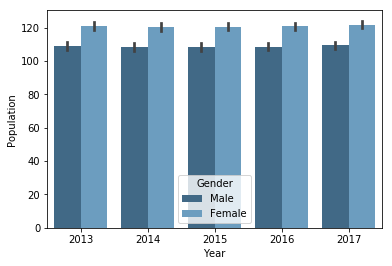

In [479]:
sns.barplot(x="Year", y="Population", hue="Gender", data=popData, palette="Blues_d");

In [460]:
temp_df = popData.loc[popData['Year'] == 2013].groupby(['Gender'])['Population'].sum()

trace = go.Pie(labels = temp_df.index,
               values = temp_df.values,
               marker = dict(colors=['#FF3659','#2067AD'], line = dict(color='#FFFFFF', width=2.5))
              )

data = [trace]
layout = go.Layout(title="Gender-Wise Distribution for Year-2013")
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

#### - Which district holds the highest number of population?


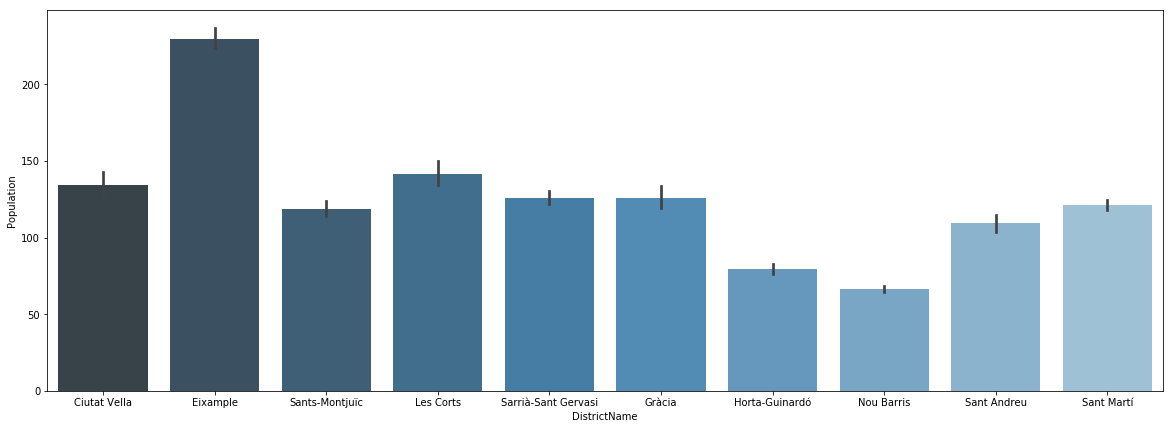

In [449]:
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "DistrictName", y = "Population", ax=ax, data=pop2013, palette="Blues_d")



In [422]:
pop2013subset = (pop2013.groupby(["DistrictName"])["Population"].sum()).to_frame().reset_index()
pop2013subset

,DistrictName,Population
0,Ciutat Vella,103339
1,Eixample,264780
2,Gràcia,120949
3,Horta-Guinardó,167743
4,Les Corts,81640
5,Nou Barris,165748
6,Sant Andreu,146846
7,Sant Martí,232826
8,Sants-Montjuïc,182685
9,Sarrià-Sant Gervasi,145266


In [423]:
# We add the link which contains the GeoJson file
COR_Geo = "https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson"
# We call folium’s library to build a map
pop_map = folium.Map(location=[41.39, 2.17], zoom_start=12) # in location we must add the city’s coordinates
# Now we can build our choropleth map by calling the .choropleth method
BCNT= pop_map.choropleth(geo_data=COR_Geo, # GeoJson Coordinates
                   data= pop2013subset ,   # The table which contains the values we are analysing
                   columns=["DistrictName", "Population"],
                   key_on="feature.properties.NOM", # We chose the key we need in the GeoJson file
                   fill_color="YlOrRd",
                   fill_opacity=0.7,
                   line_opacity=0.4,
                   legend_name="Population in Each District in 2013")
pop_map

D:\Users\Alfaisal\Anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [424]:
# We specify a lambda function mapping a GeoJson Feature to a style dict
style_function = lambda x: {"fillColor": "#FFFFFF",
                            "color":"#000000",
                            "fillOpacity": 0.1,
                            "weight": 0.1}
# We specify a function mapping a GeoJson Feature to a style dict for mouse events, in this case “highlighting”
highlight_function = lambda x: {"fillColor": "#000000",
                                "color":"#000000",
                                "fillOpacity": 0.50,
                                "weight": 0.1}
COR_Geo = "https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson"

# We create a new layer for the map which is going to give us the interactivity
BCNT = folium.features.GeoJson(COR_Geo,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=["NOM", "NOM"],
        aliases=["DistrictName:", "Population"],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)
pop_map.add_child(BCNT) # We add this new layer
pop_map.keep_in_front(BCNT) # By keeping it in front we will ensure that each time we deploy the map, this layer will be in the front
folium.LayerControl().add_to(pop_map)
pop_map

In [495]:
pop2013_MF = (pop2013.groupby(["DistrictName","Gender"])["Population"].sum()).to_frame().reset_index()
pop2013_F = pop2013_MF[pop2013_MF.Gender == "Female"].reset_index()
pop2013_F = pop2013_F.drop(columns="index")
pop2013_F = pop2013_F.drop(columns="Gender")
pop2013_F = pop2013_F.rename(columns={'Population': 'F_Population'})
pop2013_F


,DistrictName,F_Population
0,Ciutat Vella,48836
1,Eixample,142614
2,Gràcia,65486
3,Horta-Guinardó,88856
4,Les Corts,43585
5,Nou Barris,87234
6,Sant Andreu,76990
7,Sant Martí,120509
8,Sants-Montjuïc,95071
9,Sarrià-Sant Gervasi,78940


In [494]:
pop2013_M = pop2013_MF[pop2013_MF.Gender == "Male"].reset_index()
pop2013_M = pop2013_M.drop(columns="index")
pop2013_M = pop2013_M.drop(columns="Gender")
pop2013_M = pop2013_M.rename(columns={'Population': 'M_Population'})
pop2013_M

,DistrictName,M_Population
0,Ciutat Vella,54503
1,Eixample,122166
2,Gràcia,55463
3,Horta-Guinardó,78887
4,Les Corts,38055
5,Nou Barris,78514
6,Sant Andreu,69856
7,Sant Martí,112317
8,Sants-Montjuïc,87614
9,Sarrià-Sant Gervasi,66326


In [498]:
popSumNum = (pop2013_M["M_Population"] + pop2013_F["F_Population"])
popSumMF = pop2013_M
popSumMF['M_Population']= popSumNum
popSumMF

,DistrictName,M_Population
0,Ciutat Vella,103339
1,Eixample,264780
2,Gràcia,120949
3,Horta-Guinardó,167743
4,Les Corts,81640
5,Nou Barris,165748
6,Sant Andreu,146846
7,Sant Martí,232826
8,Sants-Montjuïc,182685
9,Sarrià-Sant Gervasi,145266


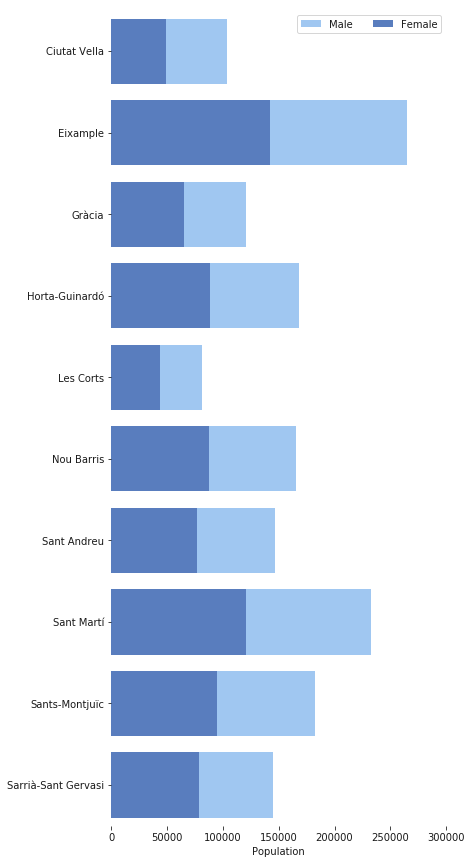

In [508]:
#sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
#MF_Number_2013 = MF_Number_2013.sort_values("Number", ascending=False)
#Female_Number_2013 = Female_Number_2013.sort_values("FNumber", ascending=False)



# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="M_Population", y="DistrictName", data= popSumMF,
            label="Male", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="F_Population", y="DistrictName", data= pop2013_F,
            label="Female", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 300000), ylabel="",
       xlabel="Population")
sns.despine(left=True, bottom=True)